In [74]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd

tf.config.list_physical_devices('GPU')

[]

In [75]:
dataset = pd.read_csv('../dataset/lung-cancer.csv')

dataset[['SMOKING','YELLOW_FINGERS','ANXIETY','PEER_PRESSURE','CHRONIC_DISEASE','FATIGUE','ALLERGY','WHEEZING','ALCOHOL_CONSUMING','COUGHING','SHORTNESS_OF_BREATH','SWALLOWING_DIFFICULTY','CHEST_PAIN']] = dataset[['SMOKING','YELLOW_FINGERS','ANXIETY','PEER_PRESSURE','CHRONIC_DISEASE','FATIGUE','ALLERGY','WHEEZING','ALCOHOL_CONSUMING','COUGHING','SHORTNESS_OF_BREATH','SWALLOWING_DIFFICULTY','CHEST_PAIN']].replace({1:0, 2:1})
dataset[['LUNG_CANCER']] = dataset[['LUNG_CANCER']].replace({2:0})
dataset.drop(['YELLOW_FINGERS','PEER_PRESSURE'], axis=1,inplace=True)

feature = dataset.drop('LUNG_CANCER',axis=1)
target = dataset['LUNG_CANCER']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(
    feature,target,
    test_size=0.2,
    random_state=np.random.randint(10))

In [85]:
model = Sequential()

model.add(Dense(13, input_shape=(13,), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(4, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [86]:
early_break = EarlyStopping(monitor='loss', patience=5)
reduce_learning_rate = ReduceLROnPlateau(patience=3)

result = model.fit(X_train, y_train, epochs = 40, batch_size=2, validation_data=(X_test, y_test), callbacks=[early_break,reduce_learning_rate])

Epoch 1/40
4432/4432 [==============================] - 4s 807us/step - loss: 0.6934 - accuracy: 0.5030 - val_loss: 0.6931 - val_accuracy: 0.5030 - lr: 0.0010
Epoch 2/40
4432/4432 [==============================] - 4s 863us/step - loss: 0.6931 - accuracy: 0.5034 - val_loss: 0.6932 - val_accuracy: 0.5030 - lr: 0.0010
Epoch 3/40
4432/4432 [==============================] - 4s 881us/step - loss: 0.6932 - accuracy: 0.5037 - val_loss: 0.6932 - val_accuracy: 0.4970 - lr: 0.0010
Epoch 4/40
4432/4432 [==============================] - 4s 877us/step - loss: 0.6932 - accuracy: 0.5005 - val_loss: 0.6932 - val_accuracy: 0.4970 - lr: 0.0010
Epoch 5/40
4432/4432 [==============================] - 4s 865us/step - loss: 0.6932 - accuracy: 0.4979 - val_loss: 0.6931 - val_accuracy: 0.5030 - lr: 1.0000e-04
Epoch 6/40
4432/4432 [==============================] - 4s 886us/step - loss: 0.6931 - accuracy: 0.5041 - val_loss: 0.6931 - val_accuracy: 0.5030 - lr: 1.0000e-04
Epoch 7/40
4432/4432 [================

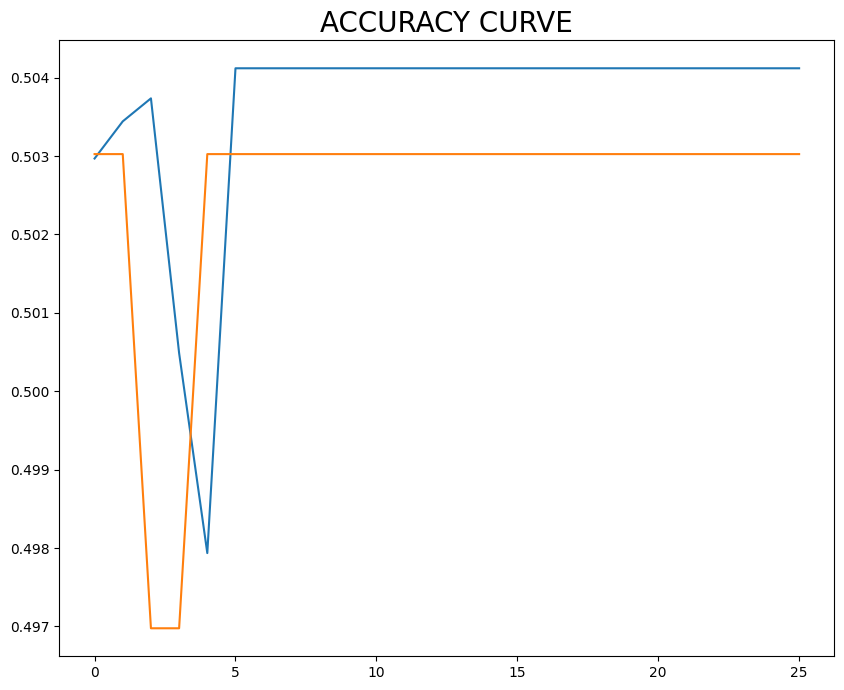

In [87]:
plt.figure(figsize=(10,8))
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('ACCURACY CURVE',fontdict={'size':20})
plt.show()

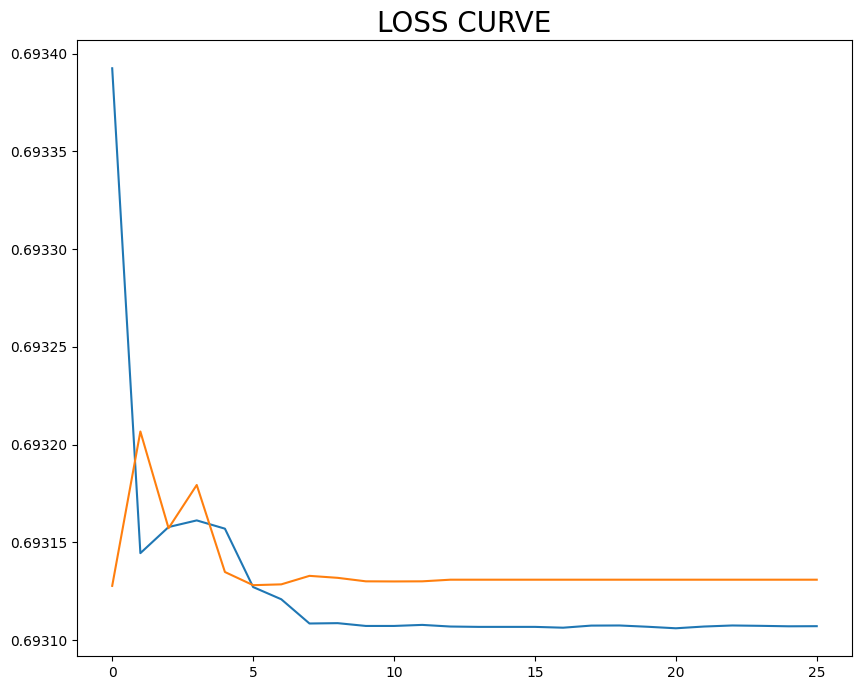

In [88]:
plt.figure(figsize=(10,8))
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('LOSS CURVE',fontdict={'size':20})
plt.show()

In [89]:
model.evaluate(X_test, y_test)

347/347 [==============================] - 0s 547us/step - loss: 0.6931 - accuracy: 0.5030


[0.6931309700012207, 0.5030237436294556]

In [ ]:
model.save('./model',overwrite=True)